* ### Họ và tên và MSSV: 
- Trương Chí Toàn - 19127587
- Phan Trung Hiếu - 19127404


Link github: https://github.com/d3gh3tpr0/Final-Project-P4DS

---

# ĐỒ ÁN CUỐI KỲ

# Môi trường code

In [26]:
import sys
sys.executable

'D:\\Users\\TCTOAN\\Downloads\\anaconda3\\envs\\min_ds-env\\python.exe'

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline
plt.style.use('seaborn-pastel')

## Giới thiệu dữ liệu

Nhóm em xin trình bày về phân tích dữ liệu về elo ranking của vận động viên tennis thuộc giải The Association of Tennis Professionals (ATP)

- Dữ liệu <i>Tennis players ranking based on ELO scores</i> được lấy từ Kaggle tại [đây](https://www.kaggle.com/ramjasmaurya/tennis-players-ranking-based-on-elo-scores?fbclid=IwAR3ReUKj-X3uYBmS2LwP-R1Jc2tLyKSzkar5Y6jcqjXn0bm3XQEzfHQ8Zhg).

- Theo thông tin về license mà tác giả đưa ra trên Kaggle, Ram Jas Maurya cho phép người sử dụng chia sẻ và tùy chỉnh dữ liệu.

In [2]:
# Đọc file csv
tennis_df = pd.read_csv('data.csv',encoding='ISO-8859-1')

## Khám phá dữ liệu

In [3]:
tennis_df.head()

,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard_court_elo_rating,clay_court_elo_rating,grass_court_elo_rating,Peak_Match,Peak_Age,Peak_Elo,Gender,Rank
0,Novak Djokovic,34.5,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,28.8,2470.0,Male,1
1,Daniil Medvedev,25.9,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,25.9,2175.1,Male,2
2,Alexander Zverev,24.7,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,2022 Atp Cup RR,24.7,2157.9,Male,3
3,Roger Federer,39.9,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,2007 Dubai F,25.6,2382.0,Male,4
4,Carlos Alcaraz,18.5,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,2021 NextGen Finals F,18.5,2029.5,Male,5


# 2. Exploring data (often interleaved with preprocessing)

## How many rows and how many columns?

In [4]:
print("Number of rows: %d\nNumber of columns: %d" % (tennis_df.shape))

Number of rows: 783
Number of columns: 14


## What is the meaning of each row?

Mỗi dòng là thông tin của một vận động viên.

## Are there duplicated rows?

In [5]:
have_duplicated_rows = (tennis_df.duplicated().any() == True)
have_duplicated_rows

False

## What is the meaning of each column?

- Player: Tên vận động viên
- Age: Tuổi của họ
- Elo: Điểm elo tổng quát của họ (không tính loại sân)
- HardRaw: Điểm elo khi thi đấu trên sân bê tông
- ClayRaw: Điểm elo khi thi đấu trên sân đất
- GrassRaw: Điểm elo khi thi đấu trên sân cỏ
- Hard_court_elo_rating: Điểm trung bình của Elo tổng và Elo trên sân bê tông
- Clay_court_elo_rating: Điểm trung bình của Elo tổng và Elo trên sân đất
- Grass_court_elo_rating: Điểm trung bình của Elo tổng và Elo trên sân cỏ
- Peak_Match: Giải đấu tham gia khi ở đỉnh cao nhất sự nghiệp
- Peak_Age: Tuổi khi ở đỉnh cao nhất sự nghiệp
- Peak_Elo: Elo khi ở đỉnh cao nhất sự nghiệp
- Gender: Giới tính
- Rank: Thứ hạng

## What is the current data type of each column? Are there columns having inappropriate data types?

Lấy dtype của mỗi cột trong tennis_df và lưu kết quả vào col_dtypes; series này có index là tên cột

In [6]:
col_dtypes = tennis_df.dtypes
col_dtypes

Player                     object
Age                       float64
Elo                       float64
HardRaw                   float64
ClayRaw                   float64
GrassRaw                  float64
hard_court_elo_rating     float64
clay_court_elo_rating     float64
grass_court_elo_rating    float64
Peak_Match                 object
Peak_Age                  float64
Peak_Elo                  float64
Gender                     object
Rank                        int64
dtype: object

Như ta thấy thì cột Player, Peak_Match và Peak_Elo có type là object. Trong Pandas, kiểu dữ liệu object thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu object có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu object chứa địa chỉ). Nếu một cột trong dataframe có dtype là object thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(lambda x:type(x)).unique())
    return dtypes

open_object_dtype(tennis_df['Player']),open_object_dtype(tennis_df['Peak_Match']),open_object_dtype(tennis_df['Gender'])

({str}, {str}, {str})

Vậy cả 3 cột đều có dạng string

## With each numerical column, how are values distributed?

In [8]:
num_col = tennis_df.columns.drop(['Player','Peak_Match','Gender'])
def missing_ratio(col):
    return col.isna().mean() * 100
nume_col_player_df = tennis_df[num_col].agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_player_df


,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard_court_elo_rating,clay_court_elo_rating,grass_court_elo_rating,Peak_Age,Peak_Elo,Rank
missing_ratio,0.0,0.0,0.63857,0.383142,20.178799,0.0,0.0,0.0,0.0,0.0,0.0
min,15.5,1032.1,910.20000,908.500000,995.300000,1010.3,970.3,1124.1,15.0,1169.0,1.0
max,42.6,2185.2,2095.30000,2016.300000,1942.400000,2130.7,2100.8,2063.8,35.1,2470.0,396.0


### Are they abnormal?

3 Cột HardRaw, ClayRaw,GrassRaw đều bị thiếu dữ liệu, nhưng mà 3 cột hard_court_elo_rating, clay_court_elo_rating, grass_court_elo_rating tương ứng thì lại không bị thiếu

## With each categorical column, how are values distributed?

In [9]:
cate_col = ['Player','Peak_Match','Gender']
def num_diff_vals(col):
    return len(col.value_counts())
def diff_vals(col):
    return col.value_counts().index.unique().to_numpy()

cate_col_player_df = tennis_df[cate_col].agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_player_df

,Player,Peak_Match,Gender
missing_ratio,0.0,0.0,0.0
num_diff_vals,783,722,2
diff_vals,"[Riccardo Bonadio, Yulia Putintseva, Katharina...","[2021 Indian Wells Qual, 2021 Roland Garros Qu...","[Female, Male]"


### Are they abnormal?

Không có tên vận động viên nào trùng nhau, giới tính chỉ có 2, còn giải đấu thì có một số vận động viên có thời đỉnh cao ở chung 1 giải nên chỉ có 722 giải. Theo em thì khá bình thường.

# 3. Asking meaningful questions
## What is the question?

Câu hỏi của thành viên 1 - Trương Chí Toàn - 19127587
- Giới tính và tuổi tác có ảnh hưởng gì tới trình độ của vận động viên hay không?


Câu hỏi của thành viên 2 - Phan Trung Hiếu - 19127404
- Loại sân khác nhau có ảnh hưởng gì tới phong độ người chơi hay không?

## What are benefits of finding the answer?

1. Giới tính và tuổi tác có ảnh hưởng gì tới trình độ của vận động viên hay không?
- Ta sẽ có cái nhìn trực quan hơn về trình độ của vận động viên khi ta thấy họ qua vẻ bề ngoài
 
2. Loại sân khác nhau có ảnh hưởng gì tới phong độ người chơi hay không?
- Khi biết được, ta sẽ biết được sân nào gây ảnh hưởng tới phong độ của người chơi mà lựa chọn sân thích hợp

# 4. Preprocessing + analyzing data to answer each question

## Does it need to have preprocessing step, and if yes, how does your group preprocess?

Nhóm em sẽ thực hiện tiền xử lý dữ liệu như sau:
- Điền lại vào các ô bị trống bằng cách từ công thức Elo = (HardRaw + hard_court_elo_rating)/2 em sẽ truy ngược ra lại giá trị bị thiếu
- Làm tròn cột tuổi
- Chia dataframe làm 2 phần, nam và nữ

#### Điền giá trị thiếu

In [10]:
def fill_missing_value(col):
    index_of_missing_value = np.argwhere(tennis_df[col].isnull().to_numpy()==True)
    index_of_need_col = int(np.argwhere(tennis_df.columns==col))
    for index in index_of_missing_value:
        tennis_df[col].iloc[index] = tennis_df.iloc[index,index_of_need_col+3] * 2 - tennis_df.Elo[index]
    
fill_missing_value('HardRaw')
fill_missing_value('ClayRaw')
fill_missing_value('GrassRaw')
tennis_df[num_col].agg([missing_ratio,pd.Series.min,pd.Series.max])

,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard_court_elo_rating,clay_court_elo_rating,grass_court_elo_rating,Peak_Age,Peak_Elo,Rank
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,15.5,1032.1,910.2,908.5,995.3,1010.3,970.3,1124.1,15.0,1169.0,1.0
max,42.6,2185.2,2095.3,2016.3,1942.4,2130.7,2100.8,2063.8,35.1,2470.0,396.0


#### Làm tròn cột tuổi

In [11]:
tennis_df.Age = tennis_df.Age.apply(lambda x:round(x))
tennis_df.Peak_Age = tennis_df.Peak_Age.apply(lambda x:round(x))
tennis_df.head()


,Player,Age,Elo,HardRaw,ClayRaw,GrassRaw,hard_court_elo_rating,clay_court_elo_rating,grass_court_elo_rating,Peak_Match,Peak_Age,Peak_Elo,Gender,Rank
0,Novak Djokovic,34,2185.2,2068.0,2016.3,1942.4,2126.6,2100.8,2063.8,2016 Miami F,29,2470.0,Male,1
1,Daniil Medvedev,26,2166.2,2095.3,1714.1,1723.4,2130.7,1940.1,1944.8,2022 Atp Cup RR,26,2175.1,Male,2
2,Alexander Zverev,25,2141.3,2056.7,1999.1,1671.4,2099.0,2070.2,1906.4,2022 Atp Cup RR,25,2157.9,Male,3
3,Roger Federer,40,2043.0,1936.7,1749.6,1813.4,1989.8,1896.3,1928.2,2007 Dubai F,26,2382.0,Male,4
4,Carlos Alcaraz,18,2029.5,1906.3,1834.4,1441.4,1967.9,1932.0,1735.5,2021 NextGen Finals F,18,2029.5,Male,5


#### Chia dataframe làm 2 phần, nam và nữ

In [12]:
male = tennis_df.Gender.loc[lambda x: x == 'Male'].index[-1]
female = tennis_df.Gender.loc[lambda x: x == 'Female'].index[0]
tennis_male = tennis_df.loc[:male]
tennis_female = tennis_df.loc[female:]


Số lượng tuyển thủ nam, tuyển thủ nữ

In [13]:
print("Số lượng tuyển thủ nam {}".format(len(tennis_male)))
print("Số lượng tuyển thủ nữ {}".format(len(tennis_female)))


Số lượng tuyển thủ nam 387
Số lượng tuyển thủ nữ 396


# Trả lời câu hỏi

## 1.Giới tính và tuổi tác có ảnh hưởng gì tới trình độ của vận động viên hay không?


Để trả lời câu hỏi trên, đầu tiên ta xét về giới tính trước. Ở đây ta sẽ vẽ box plot thể hiện giữa Elo và giới tính

Boxplot thể hiện elo của vận động viên nam

count     387.000000
mean     1579.065633
std       187.304037
min      1087.300000
25%      1434.600000
50%      1559.400000
75%      1695.950000
max      2185.200000
Name: Elo, dtype: float64

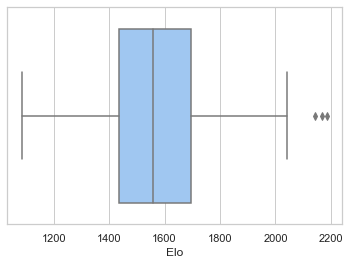

In [29]:
sns.boxplot(x=tennis_male['Elo'])
tennis_male['Elo'].describe()

Boxplot thể hiện elo của vận động viên nữ

count     396.000000
mean     1548.454798
std       201.259457
min      1032.100000
25%      1402.950000
50%      1528.700000
75%      1688.825000
max      2132.000000
Name: Elo, dtype: float64

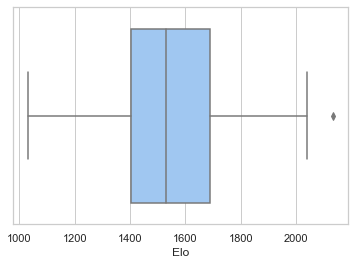

In [15]:
sns.boxplot(x=tennis_female['Elo'])
tennis_female['Elo'].describe()

Thể hiện 2 boxplot trên ở cùng 1 biểu đồ

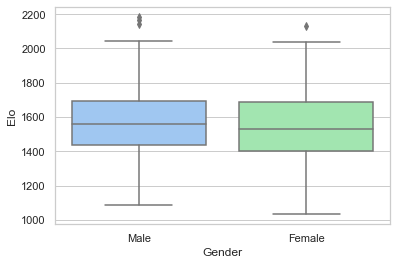

In [16]:
Elo_box_fm = sns.boxplot(x=tennis_df["Gender"],y=tennis_df['Elo'])

Hmm, dự đoán của em ban đầu là nam sẽ có trình độ trung bình cao hơn nữ, nhưng sau khi vẽ boxplot của cả 2, như ta thấy ở trên, boxplot của nam và nữ đều không quá khác biệt nhau. 

Số lượng tuyển thủ nam và nữ, elo mean, các khoảng tứ phân vị đều không quá cách biệt nhau, trừ 1 vài tuyển thủ nam có elo cao dẫn đầu ra thì có thể nói elo (trình độ) của nam và nữ đều khá là ngang nhau.

Chứng tỏ giới tính không hề ảnh hưởng tới trình độ của người chơi. Chỉ cần chăm chỉ tập luyện là đều có thể trở nên tốt hơn.

Tiếp theo, ta sẽ xem độ tuổi có ảnh hưởng gì tới trình độ người chơi hay không?

Trước tiên, ta tính khoảng cách giữa độ tuổi hiện tại và độ tuổi khi ở thời đỉnh cao của các vận động viên

In [17]:
tennis_Age_dis = tennis_df.Age-tennis_df.Peak_Age
tennis_Age_sr = tennis_Age_dis.value_counts().sort_index()
tennis_Age_sr

0     229
1     104
2     114
3      76
4      63
5      56
6      28
7      23
8      21
9      13
10     18
11     15
12     11
13      6
14      5
20      1
dtype: int64

Vẽ biểu đồ trực quan hóa

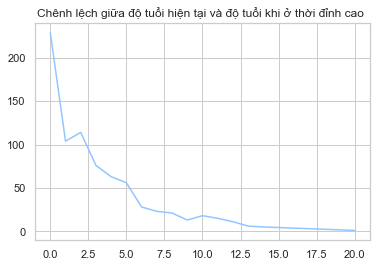

In [18]:
tennis_Age_sr.plot.line()
plt.title('Chênh lệch giữa độ tuổi hiện tại và độ tuổi khi ở thời đỉnh cao ')
plt.show()

Số vận động viên đang ở độ tuổi đỉnh cao chiếm đông nhất, sau đó giảm dần xuống những người đã qua tuổi đỉnh cao, khoảng cách càng lớn thì càng ít

Tiếp theo, ta tính tiếp khoảng cách giữa elo hiện tại và elo khi ở thời đỉnh cao

In [19]:
tennis_Elo_dis = tennis_df.Peak_Elo-tennis_df.Elo
tennis_Elo_sr = tennis_Elo_dis.value_counts().sort_index()
tennis_Elo_df = tennis_Elo_sr.to_frame().reset_index()
tennis_Elo_df.rename(columns={"index":"Elo dis",0:'Number of player'},inplace=True)
tennis_Elo_df

,Elo dis,Number of player
0,0.0,14
1,1.0,1
2,1.9,1
3,3.4,1
4,4.8,1
...,...,...
690,449.3,1
691,504.1,1
692,505.2,1
693,514.2,1


Hmm, vì elo tính theo số thập phân thứ nhất nên có khá nhiều dòng, để cho dễ trực quan, ta sẽ gom lại số lượng khoảng cách elo trong range 100.

In [20]:
range_elo = []
range_elo.append(tennis_Elo_df[tennis_Elo_df['Elo dis']<100]['Number of player'].to_numpy().sum())
range_elo.append(tennis_Elo_df[(tennis_Elo_df['Elo dis']<200) & (tennis_Elo_df['Elo dis']>100) ]['Number of player'].to_numpy().sum())
range_elo.append(tennis_Elo_df[(tennis_Elo_df['Elo dis']<300) & (tennis_Elo_df['Elo dis']>200) ]['Number of player'].to_numpy().sum())
range_elo.append(tennis_Elo_df[(tennis_Elo_df['Elo dis']<400) & (tennis_Elo_df['Elo dis']>300) ]['Number of player'].to_numpy().sum())
range_elo.append(tennis_Elo_df[tennis_Elo_df['Elo dis']>500]['Number of player'].to_numpy().sum())


Vẽ biểu đồ trực quan

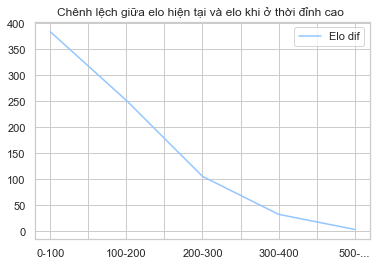

In [21]:
df_range_elo = pd.DataFrame(data=range_elo,index=['0-100','100-200','200-300','300-400','500-...'])
df_range_elo.rename(columns={0:'Elo dif'},inplace=True)
df_range_elo.plot.line()
plt.title('Chênh lệch giữa elo hiện tại và elo khi ở thời đỉnh cao ')
plt.show()

Như ta thấy, từ 2 biểu đồ trên, khoảng cách giữa độ chênh lệch tuổi giữa hiện tại với thời đỉnh cao và độ chênh lệch elo giữa hiện tại với thời đỉnh cao tỉ lệ thuận với nhau. 

Từ đó, ta kết luận rằng:
- Giới tính không ảnh hưởng tới trình độ của vận động viên
- Còn tuổi tác thì có ảnh hưởng

## 2. Loại sân khác nhau có ảnh hưởng gì tới phong độ người chơi hay không?

Đầu tiên ta sẽ vẽ biểu đồ so sánh sự khác nhau của elo trung bình trên từng loại sân 

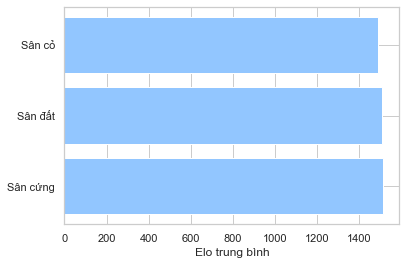

In [22]:
mean_hard = tennis_df['hard_court_elo_rating'].mean()
mean_clay = tennis_df['clay_court_elo_rating'].mean()
mean_grass = tennis_df['grass_court_elo_rating'].mean()

plt.barh(['Sân cứng', 'Sân đất', 'Sân cỏ'], [mean_hard, mean_clay, mean_grass])
plt.xlabel('Elo trung bình')
plt.show()

Nhận xét: Sự khác biệt lớn nhất của phong độ người chơi là nằm ở sân cứng và sân cỏ, có vẻ như ở sân cứng thì các tuyển thủ sẽ thi đấu tốt hơn so với sân cỏ

Tìm ra người chơi nam tốt nhất ở sân cứng, rank của họ, người chơi tốt nhất và rank của họ để có cái nhìn nhận trực quan về sự "đồng biến" giữa trình độ sân cứng, trình độ chung cũng như xếp hạng của họ

In [23]:
#người chơi nam tốt nhất ở sân cứng 
best_man_hard_index = tennis_male['hard_court_elo_rating'].argmax()
best_man_hard_name = tennis_male.iloc[best_man_hard_index]['Player']
best_man = tennis_male.iloc[0]['Player']
str(best_man_hard_name).replace("\xa0", " "), best_man_hard_index, str(best_man).replace("\xa0", " "), "0"


('Daniil Medvedev', 1, 'Novak Djokovic', '0')

Làm tương tự với các player nữ

In [24]:
#người chơi nữ tốt nhất ở sân cứng
best_female_hard_index = tennis_female['hard_court_elo_rating'].argmax()
best_female_hard_name = tennis_female.iloc[best_female_hard_index]['Player']
best_female = tennis_female.iloc[0]['Player']
str(best_female_hard_name).replace("\xa0", " "), best_female_hard_index, str(best_female).replace("\xa0", " "), "0"

('Ashleigh Barty', 0, 'Ashleigh Barty', '0')

Nhận xét: với cả nam lẫn nữ, thì nếu có elo thi đấu ở sân cứng cao thì khả năng elo trung bình cũng cao và kéo theo cả rank

Tính tỉ lệ các tuyển thủ có chỉ số elo đấu sân cứng tốt hơn so với sân cỏ và tỉ lệ đó so với top 50 của từng giới tính

In [25]:
#tỉ lệ các tuyển thủ có chỉ số elo đấu sân cứng tốt hơn so với sân cỏ
hard_vs_grass = np.average(tennis_df['HardRaw'].to_numpy()>tennis_df['GrassRaw'].to_numpy())
#tỉ lệ các tuyển thủ nam nằm trong top 50 có chỉ số elo đấu sân cứng tốt hơn so với sân cỏ
hard_vs_grass_top_man = np.average(tennis_male['HardRaw'].to_numpy()[:50]>tennis_male['GrassRaw'].to_numpy()[:50])
#tỉ lệ các tuyển thủ nữ nằm trong top 50 có chỉ số elo đấu sân cứng tốt hơn so với sân cỏ
hard_vs_grass_top_female = np.average(tennis_female['HardRaw'].to_numpy()[:50]>tennis_female['GrassRaw'].to_numpy()[:50])

hard_vs_grass, hard_vs_grass_top_man, hard_vs_grass_top_female

(0.6219667943805874, 0.9, 0.96)

Nhận xét : rõ ràng đa số tuyển thủ đều có elo cao ở những trận đấu sân cứng, và với những tuyển thủ top cao(50) thì điều đó
càng rõ ràng hơn 

*Kết luận: Loại sân có ảnh hưởng nhiều đến kết quả thi đấu cũng như phong độ của tuyển thủ


Góp ý của thành viên nhóm khác: "mình cũng là một người thích xem quần vợt thì mình có thấy một số điều như là hầu như có rất nhiều giải làm trên mặt sân cứng (khoảng 40) và rất ít giải làm trên sân cỏ (khoảng 7 cho nam) thì điều này có làm ảnh hưởng gì tới kết quả không, và mình thấy hầu như các vận động viên hàng đầu có rất nhiều người đánh sân đất nện hơn là sân cứng"

*Trả lời : Có vẻ như góp ý của bạn là đúng, các giải đấu tổ chức bằng sân cỏ khá ít dẫn tới việc missing value ở cột GrassRaw là khá nhiều (20%). Tuy nhiên thì phần dữ liệu cũng không nêu rõ là một tuyển thủ có bao nhiệu trận sân cứng, bao nhiêu trận sân cỏ cũng như tỉ lệ thắng thua ở đó ra sao nên khó đểp phân tích chuyên sâu vào vấn đề này. Một ý nữa mà mình đã đề cập ở trên là với những tuyển thủ có elo ở sân cứng tốt hơn elo ở sân cỏ thì thường có thứ hạng cao. Nên việc có ít giải sân cỏ, theo quan điểm của mình là nó không ảnh hưởng đến trình độ cũng như phong độ của tuyển thủ, cụ thể chính là thứ hạng của họ

# 5. Reflection

## Each member: What difficulties have you encountered?

Trương Chí Toàn:
- Làm nhiều đồ án khiến cho nên thời gian khá hạn hẹp
- Phải dựa vào thông tin sẵn có để chọn biểu đồ thích hợp

Phan Trung Hiếu:
- Kì vừa rồi em học khá nhiều môn và việc cuối kì dồn nhiều đồ án + với việc thi lý thuyết thực sự rất khó khăn
- Đại dịch học ở nhà hơn nửa năm làm em khá uể oải, mong rằng kì sau sẽ được lên trường học tập để có động lực hơn

## Each member: What have you learned? 

Trương Chí Toàn:
- Học được cách sử dụng seaborn một cách hiệu quả
- Cách thu thập dữ liệu một cách dễ dàng
- Học được nhiều dạng biểu đồ khác nhau mà lựa chọn ra những biểu đồ phù hợp với trường dữ liệu

Phan Trung Hiếu: 
- Em nhận ra rằng việc tự mình đặt ra một câu hỏi mang một ý nghĩa nào đó có ích trong KHDL thật sự rất khó khăn
- Có nhiều loại biểu đồ, phải chọn được biểu đồ phù hợp nhất để mô tả câu trả lời
- Nên chọn các file dữ liệu ít có dấu " " vì dễ gặp lỗi Encoding trong quá trình đọc file cũng như xử lý và hiển thị dữ liệu

## Your group: If you had more time, what would you do?

- Bọn em sẽ chọn bộ dữ liệu phức tạp hơn cái này
- Nhiều dữ liệu đồng nghĩa với nhiều thứ để hỏi hơn, câu hỏi phức tạp hơn, mang nhiều lợi ích hơn
- Áp dụng được machine learning để build được model để dự đoán thuộc tính của data

# 6. References

1. [Seaborn documentation](https://seaborn.pydata.org/examples/index.html)
2. [StackOverflow](https://stackoverflow.com/)
3. [Kaggle](https://kaggle.com/)
4. [Tennisabstract](https://tennisabstract.com/reports/atp_elo_ratings.html)
5. [Matplotlib documentation](https://matplotlib.org/)
6. [Pandas documentation](https://pandas.pydata.org/)